# API usage for TorchRL MAC

### Import functions for training wrapper and train config

In [1]:
from TorchRL_MAC_utils import train_wrapper, default_cfg

### Define training configuration

In [2]:
# Create configuration
cfg = default_cfg()

# --- CRITICAL FOR PPO STABILITY ---
# PPO needs more data per update. 
# 128 steps * 4 envs = 512 total samples per update (Minimum for stable PPO)
cfg.rollout_len = 128        
cfg.num_envs = 4

# PPO Hyperparameters 
cfg.ppo_epochs = 4           
cfg.clip_param = 0.2         
cfg.entropy_coef = 0.01      

# Training run
cfg.num_iters = 2000         
cfg.lr = 3e-4
cfg.hidden_dim = 128         
cfg.log_interval = 10        

# Evaluation settings
cfg.eval_episodes = 20       
cfg.eval_interval = 200     

print("Configuration:")
print(f"  Training iterations: {cfg.num_iters}")
print(f"  Batch size (steps * envs): {cfg.rollout_len * cfg.num_envs}")
print(f"  Learning rate: {cfg.lr}")


Configuration:
  Training iterations: 2000
  Batch size (steps * envs): 512
  Learning rate: 0.0003


### Function call to training wrapper

This runs the training loop and plots training curves (training loss, episode returns, and policy entropy).

Starting training with config:
MacConfig(env_name='simple_reference', num_envs=4, max_cycles=25, continuous_actions=False, hidden_dim=128, actor_layers=2, critic_layers=2, num_iters=2000, rollout_len=128, lr=0.0003, gamma=0.99, entropy_coef=0.01, value_coef=0.5, max_grad_norm=0.5, eval_episodes=20, success_threshold=-150.0, seed=42, device='cpu', checkpoint_dir='./checkpoints', log_interval=10)


/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:1018: UserWarning: PettingZoo failed to load all modules with error message No module named 'multi_agent_ale_py', trying to load individual modules.
  warnings.warn(
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:51: UserWarning: SISL environments failed to load with error message No module named 'Box2D'.
  warnings.warn(f"SISL environments failed to load with error message {err}.")
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:57: UserWarning:

Iter 10/2000 | Loss: 272.219 | Return: -20.727 | Entropy: 7.824
Iter 20/2000 | Loss: 283.786 | Return: -21.528 | Entropy: 7.824
Iter 30/2000 | Loss: 238.190 | Return: -19.437 | Entropy: 7.824
Iter 40/2000 | Loss: 240.562 | Return: -19.860 | Entropy: 7.824
Iter 50/2000 | Loss: 251.035 | Return: -20.100 | Entropy: 7.824
Iter 60/2000 | Loss: 217.081 | Return: -18.850 | Entropy: 7.824
Iter 70/2000 | Loss: 237.417 | Return: -20.624 | Entropy: 7.824
Iter 80/2000 | Loss: 241.440 | Return: -20.853 | Entropy: 7.824
Iter 90/2000 | Loss: 250.086 | Return: -21.271 | Entropy: 7.824
Iter 100/2000 | Loss: 268.014 | Return: -22.373 | Entropy: 7.824
Iter 110/2000 | Loss: 228.202 | Return: -20.840 | Entropy: 7.824
Iter 120/2000 | Loss: 251.697 | Return: -22.309 | Entropy: 7.824
Iter 130/2000 | Loss: 215.168 | Return: -20.777 | Entropy: 7.824
Iter 140/2000 | Loss: 244.807 | Return: -22.018 | Entropy: 7.824
Iter 150/2000 | Loss: 203.651 | Return: -20.399 | Entropy: 7.824
Iter 160/2000 | Loss: 209.817 | Re

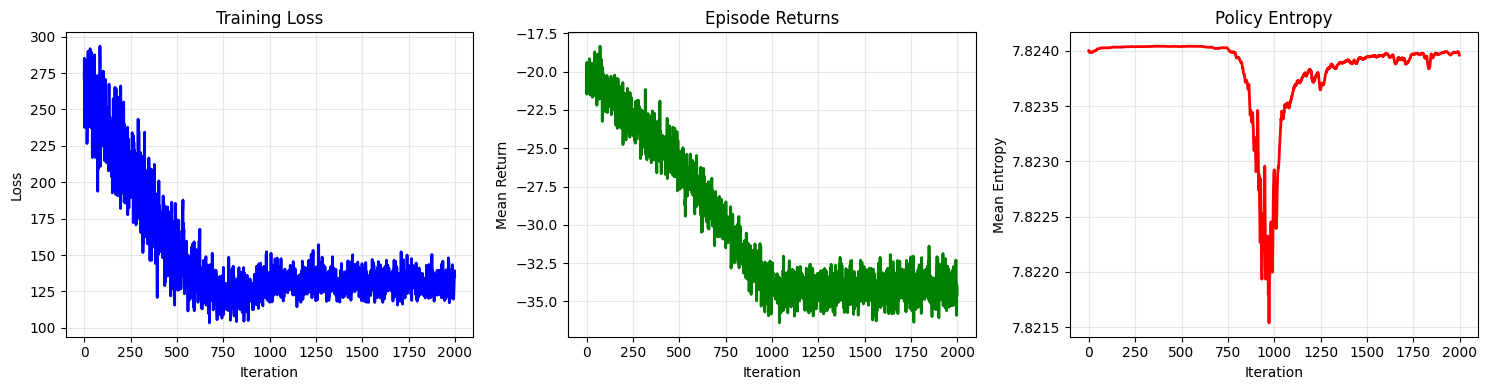

Training curves saved to: mac_training_curves.png


In [3]:
train_wrapper(cfg)